Lead Scoring
Logistic Regression
Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.

When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’.

If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:image.jpg

Lead Conversion Process - Demonstrated as a funnel As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom.

In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers.
The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

Another thing that you also need to check out for are the levels present in the categorical variables.

Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.

Goal
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [ ]:
import numpy as np

In [341]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [342]:
data=pd.read_csv(r"C:\Users\ujjawalv\Documents\Leads X Education.csv")

In [343]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [344]:
list(zip(data.columns,data.dtypes,data.nunique()))

[('Prospect ID', dtype('O'), 9240),
 ('Lead Number', dtype('int64'), 9240),
 ('Lead Origin', dtype('O'), 5),
 ('Lead Source', dtype('O'), 21),
 ('Do Not Email', dtype('O'), 2),
 ('Do Not Call', dtype('O'), 2),
 ('Converted', dtype('int64'), 2),
 ('TotalVisits', dtype('float64'), 41),
 ('Total Time Spent on Website', dtype('int64'), 1731),
 ('Page Views Per Visit', dtype('float64'), 114),
 ('Last Activity', dtype('O'), 17),
 ('Country', dtype('O'), 38),
 ('Specialization', dtype('O'), 19),
 ('How did you hear about X Education', dtype('O'), 10),
 ('What is your current occupation', dtype('O'), 6),
 ('What matters most to you in choosing a course', dtype('O'), 3),
 ('Search', dtype('O'), 2),
 ('Magazine', dtype('O'), 1),
 ('Newspaper Article', dtype('O'), 2),
 ('X Education Forums', dtype('O'), 2),
 ('Newspaper', dtype('O'), 2),
 ('Digital Advertisement', dtype('O'), 2),
 ('Through Recommendations', dtype('O'), 2),
 ('Receive More Updates About Our Courses', dtype('O'), 1),
 ('Tags', dty

In [345]:
ld=data

In [346]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in ld.columns if ld[feature].isnull().sum()>1 and ld[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(ld[feature].isnull().mean(),4)))

Lead Source: 0.0039% missing values
Last Activity: 0.0111% missing values
Country: 0.2663% missing values
Specialization: 0.1556% missing values
How did you hear about X Education: 0.2389% missing values
What is your current occupation: 0.2911% missing values
What matters most to you in choosing a course: 0.2932% missing values
Tags: 0.3629% missing values
Lead Quality: 0.5159% missing values
Lead Profile: 0.2932% missing values
City: 0.1537% missing values
Asymmetrique Activity Index: 0.4565% missing values
Asymmetrique Profile Index: 0.4565% missing values


In [347]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in ld.columns if ld[feature].isnull().sum()>1 and ld[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(ld[feature].isnull().mean(),4)))

TotalVisits: 0.0148% missing value
Page Views Per Visit: 0.0148% missing value
Asymmetrique Activity Score: 0.4565% missing value
Asymmetrique Profile Score: 0.4565% missing value


In [348]:
ld.shape

(9240, 37)

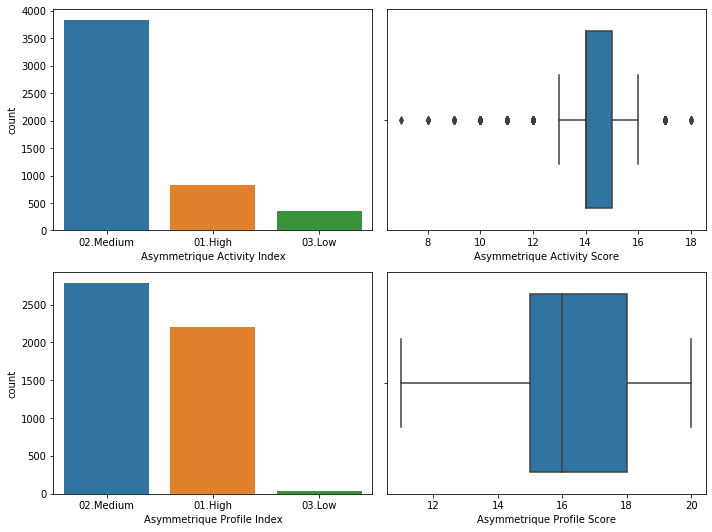

In [349]:
fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(ld['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(ld['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(ld['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(ld['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

In [350]:
# we will drop these attributes because they have high amount of null values
# also we have high amount of variations
ld = ld.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score',
                  'Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

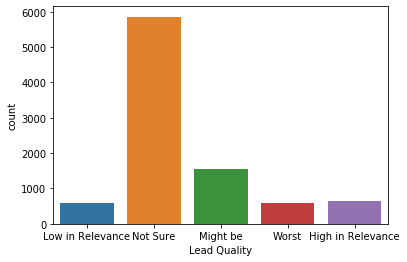

In [351]:
# As Lead quality is based on the intution of employee, so if left blank we can impute 'Not Sure' in NaN safely.
ld["Lead Quality"].value_counts()
ld["Lead Quality"]=ld["Lead Quality"].replace(np.nan,"Not Sure")
sns.countplot(ld['Lead Quality'])

In [352]:
# As Lead quality is based on the intution of employee, so if left blank we can impute 'Not Sure' in NaN safely.
ld["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Germany                    4
Nigeria                    4
Canada                     4
South Africa               4
Sweden                     3
Netherlands                2
Philippines                2
Asia/Pacific Region        2
Italy                      2
Uganda                     2
Belgium                    2
Ghana                      2
Bangladesh                 2
China                      2
Indonesia                  1
Liberia                    1
Malaysia                   1
Kenya                      1
Tanzania                   1
Russia                     1
Vietnam       

In [353]:
# we will replace nan values with india
ld["Country"]=ld["Country"].replace(np.nan,"India")

In [354]:
ld["City"].value_counts()
# replace city with mumbai for na value
ld["City"]=ld["City"].replace(np.nan,"Mumbai")

In [355]:
ld["Lead Profile"].value_counts()
# replace with select the na value

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [356]:
ld["Lead Profile"]=ld["Lead Profile"].replace(np.nan,"Select")

In [357]:
ld["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [358]:
ld["Tags"]=ld["Tags"].replace(np.nan,"Will revert after reading the email")

In [359]:
ld['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [360]:
ld['What matters most to you in choosing a course']=ld['What matters most to you in choosing a course'].replace(np.nan,"Better Career Prospects")

In [361]:
ld['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [362]:
ld['What is your current occupation']=ld['What is your current occupation'].replace(np.nan,"Unemployed")

In [363]:
ld['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [364]:
ld['How did you hear about X Education']=ld['How did you hear about X Education'].replace(np.nan,"Select")

In [365]:
ld["Specialization"].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [366]:
ld['Specialization']=ld['Specialization'].replace(np.nan,"Select")

In [367]:
# rest there are less null values so drop the rows

In [368]:
ld.dropna(inplace = True)

In [369]:
# now data is cleaned for explanatory data analysis

In [370]:
ld.corr()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.022830,0.022094,0.018360,0.058703
Converted,0.022830,1.000000,0.032855,0.359261,0.000260
TotalVisits,0.022094,0.032855,1.000000,0.219723,0.511068
Total Time Spent on Website,0.018360,0.359261,0.219723,1.000000,0.318350
Page Views Per Visit,0.058703,0.000260,0.511068,0.318350,1.000000


In [371]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 33 columns):
Prospect ID                                      9074 non-null object
Lead Number                                      9074 non-null int64
Lead Origin                                      9074 non-null object
Lead Source                                      9074 non-null object
Do Not Email                                     9074 non-null object
Do Not Call                                      9074 non-null object
Converted                                        9074 non-null int64
TotalVisits                                      9074 non-null float64
Total Time Spent on Website                      9074 non-null int64
Page Views Per Visit                             9074 non-null float64
Last Activity                                    9074 non-null object
Country                                          9074 non-null object
Specialization                                   9074 

In [372]:
ld=ld.drop(['Prospect ID'],1)

In [373]:
cat_cols=ld.select_dtypes(["O"]).columns

In [374]:
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

C:\Users\ujjawalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\ujjawalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\ujjawalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and m

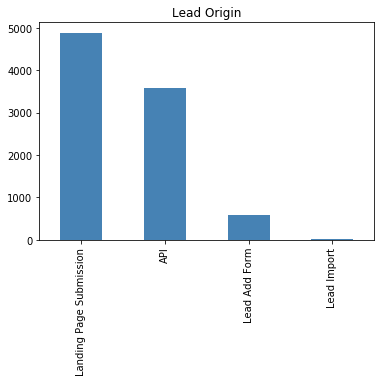

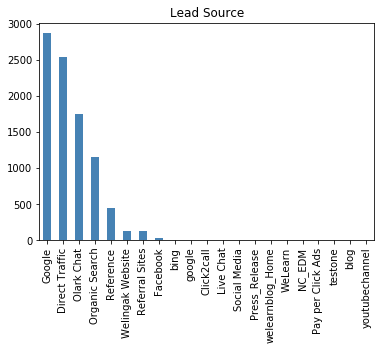

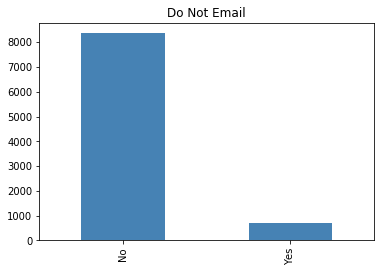

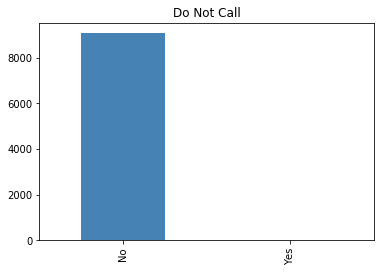

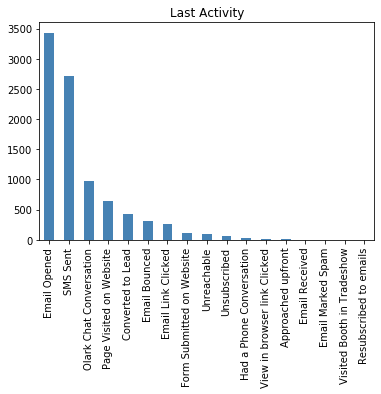

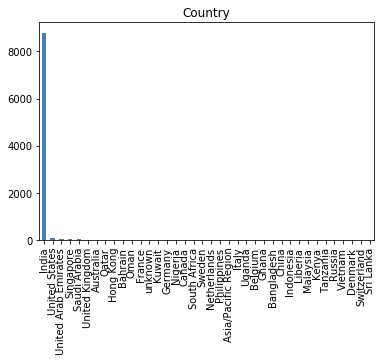

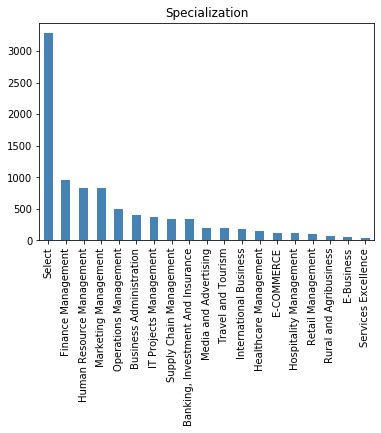

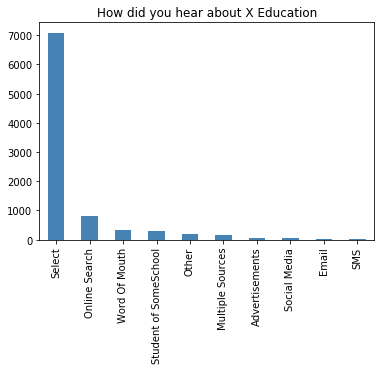

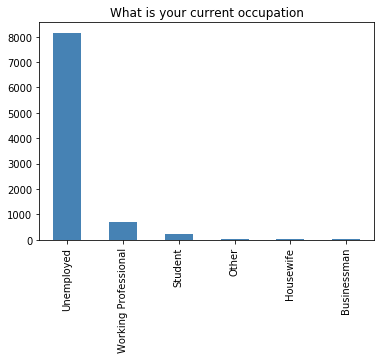

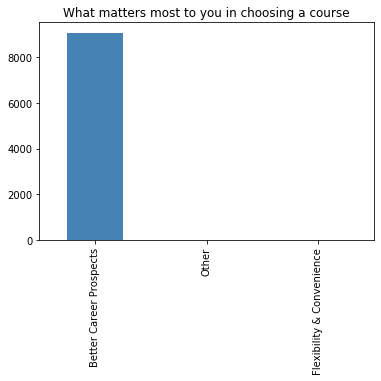

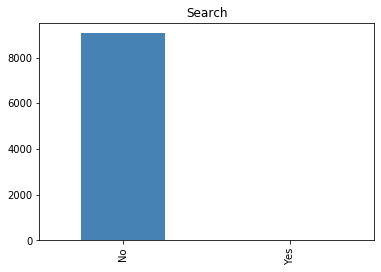

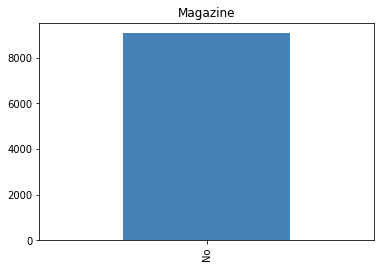

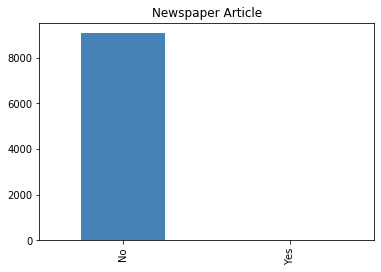

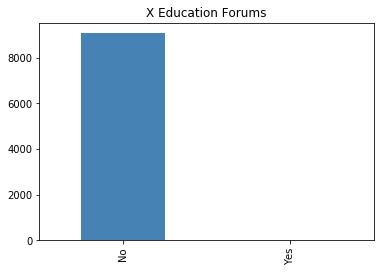

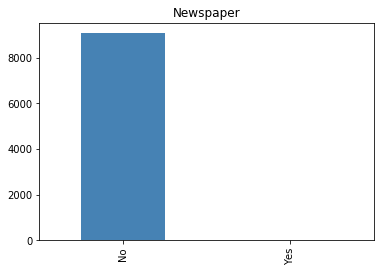

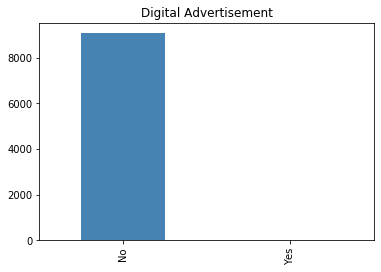

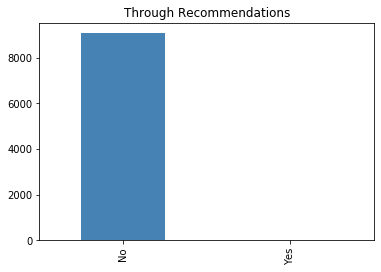

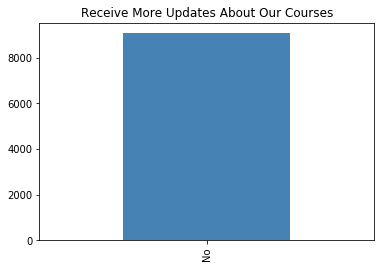

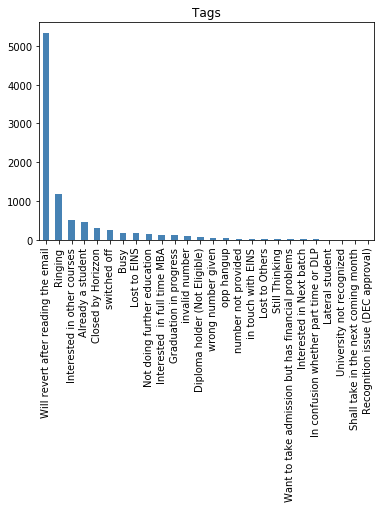

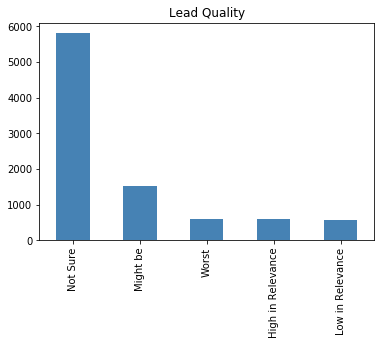

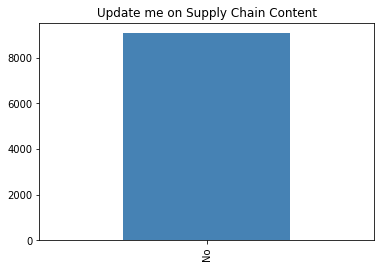

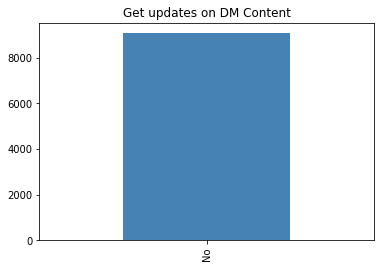

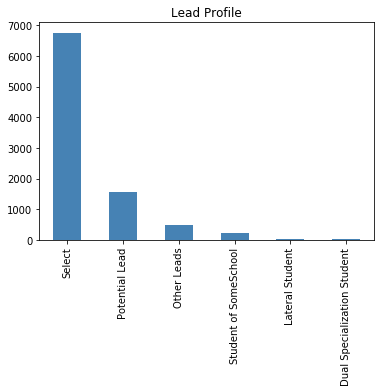

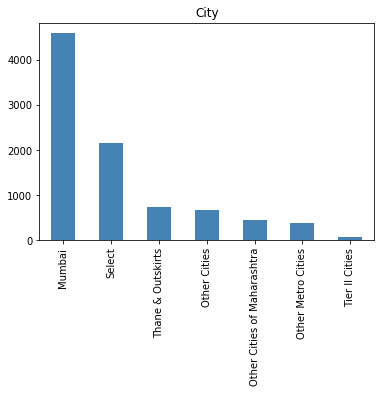

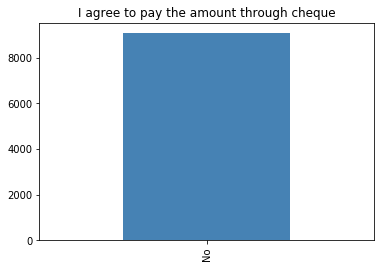

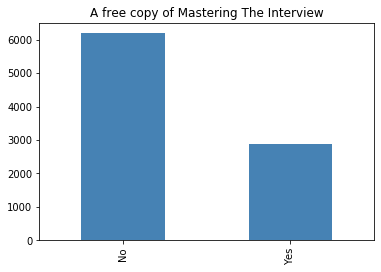

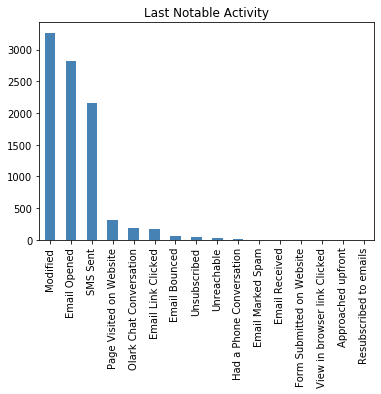

In [375]:
for attr in cat_cols:
  plt.figure()
  ld[attr].value_counts().plot(kind='bar', color='steelblue');
  plt.title(attr);

Support (Lead Origin)

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64 

Support (Lead Source)

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
welearnblog_Home        1
WeLearn                 1
NC_EDM                  1
Pay per Click Ads       1
testone                 1
blog                    1
youtubechannel          1
Name: Lead Source, dtype: int64 

Support (Do Not Email)

No     8358
Yes     716
Name: Do Not Email, dtype: int64 

Support (Do Not Call)

No     9072
Yes       2
Name: Do Not Call, dtype: int64 

Support (Last Activity)

Email Opened           

C:\Users\ujjawalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


Support (Update me on Supply Chain Content)

No    9074
Name: Update me on Supply Chain Content, dtype: int64 

Support (Get updates on DM Content)

No    9074
Name: Get updates on DM Content, dtype: int64 

Support (Lead Profile)

Select                         6757
Potential Lead                 1554
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64 

Support (City)

Mumbai                         4596
Select                         2156
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64 

Support (I agree to pay the amount through cheque)

No    9074
Name: I agree to pay the amount through cheque, dtype: int64 

Support (A free copy of Mastering The Interview)

No     6186
Yes    2888
Name: A free copy of M

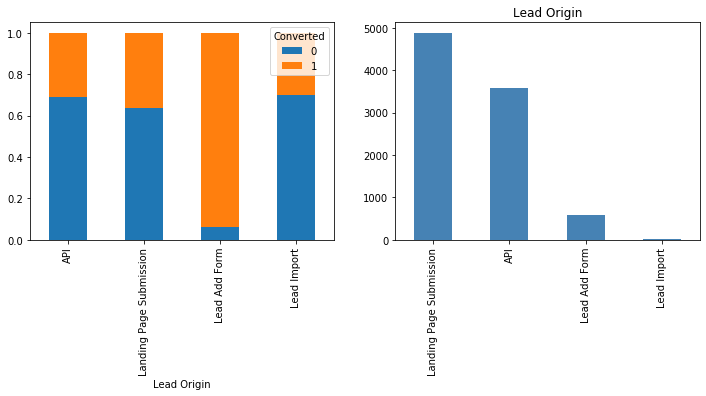

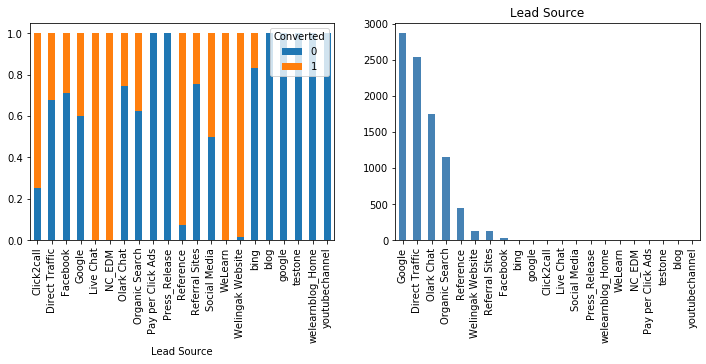

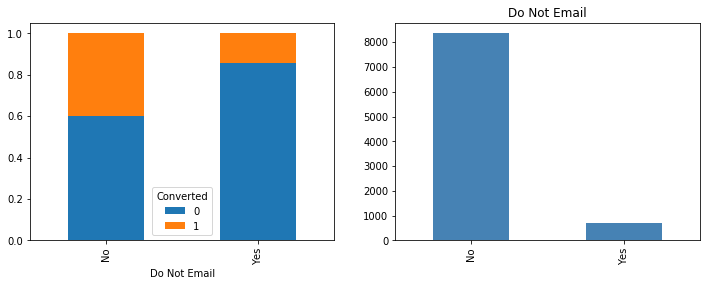

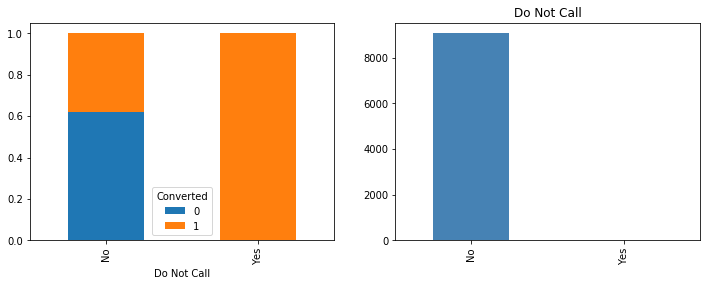

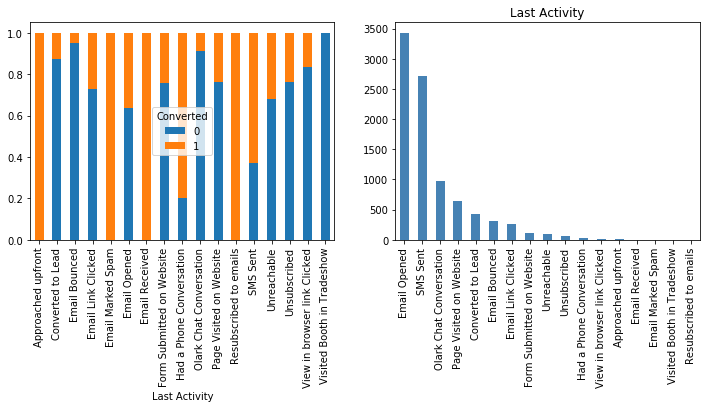

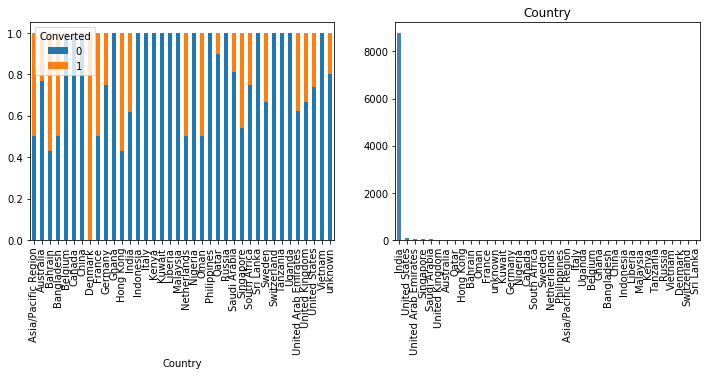

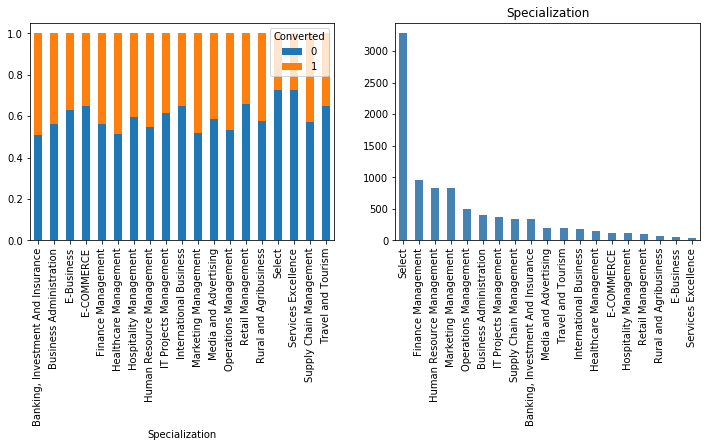

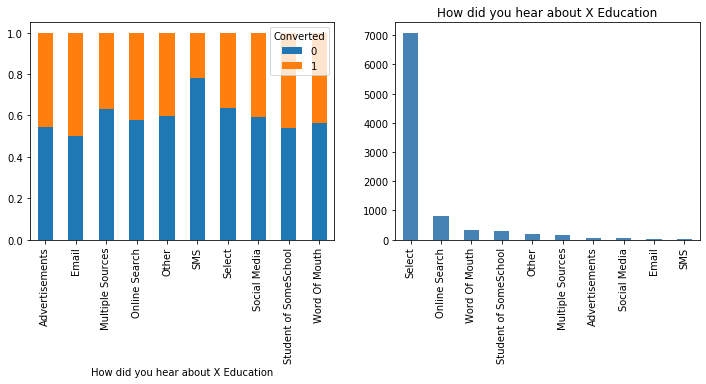

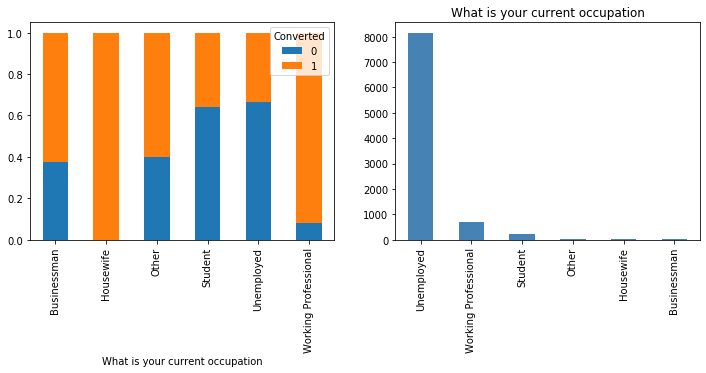

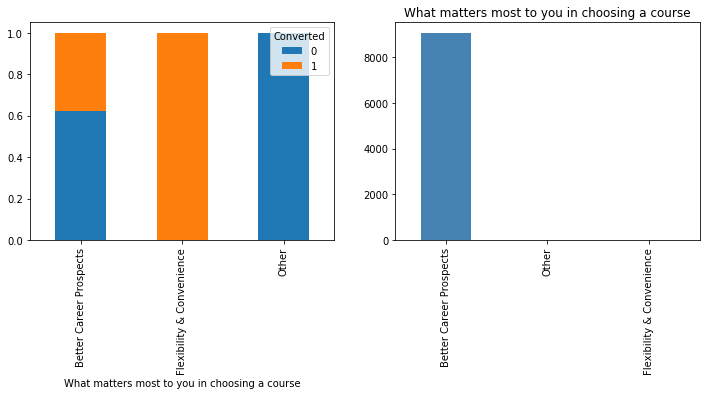

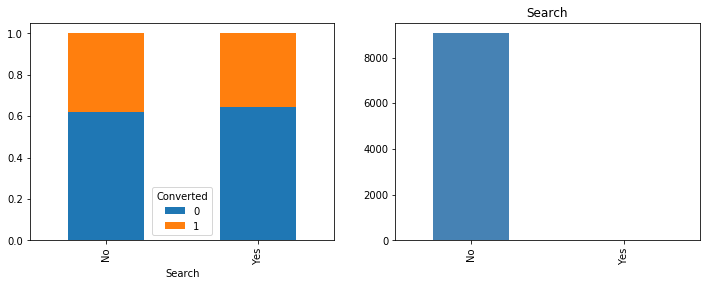

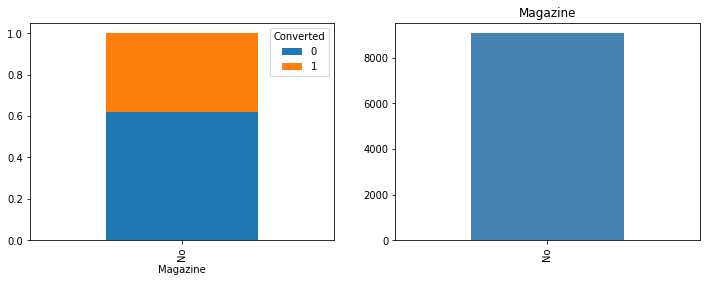

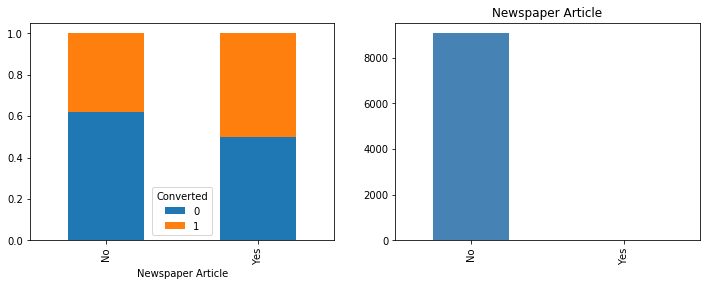

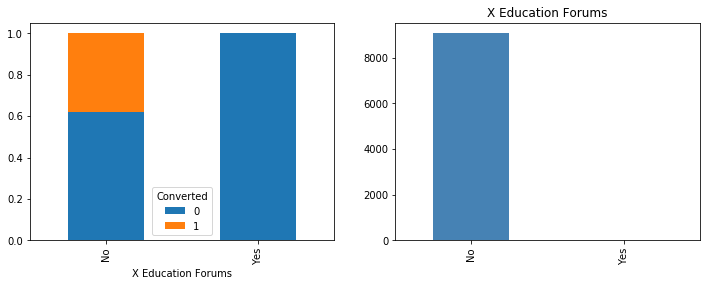

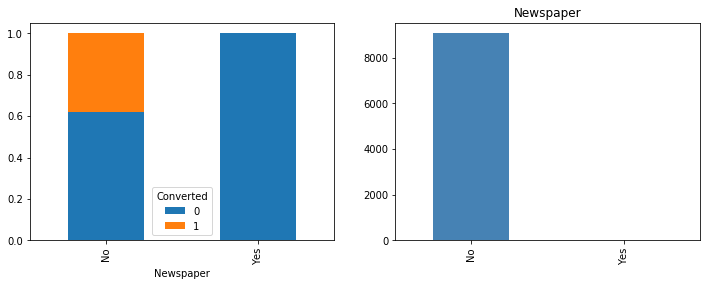

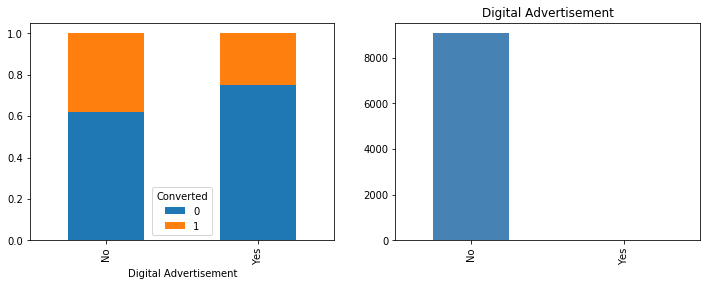

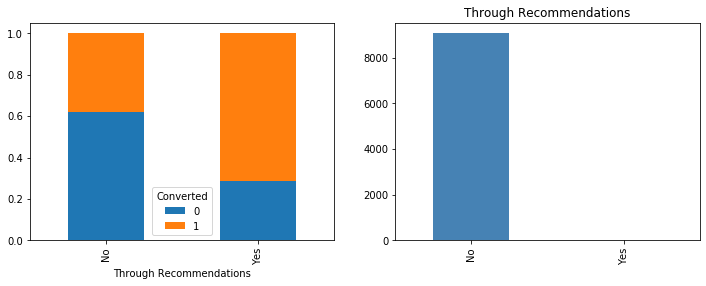

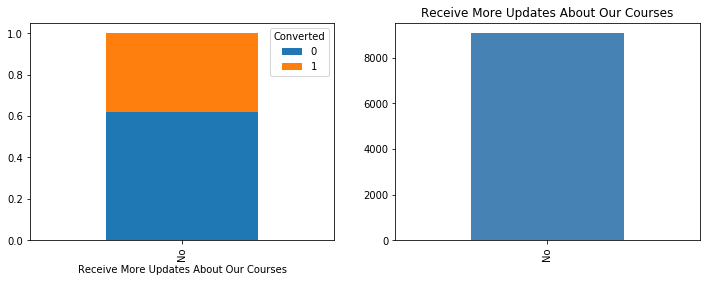

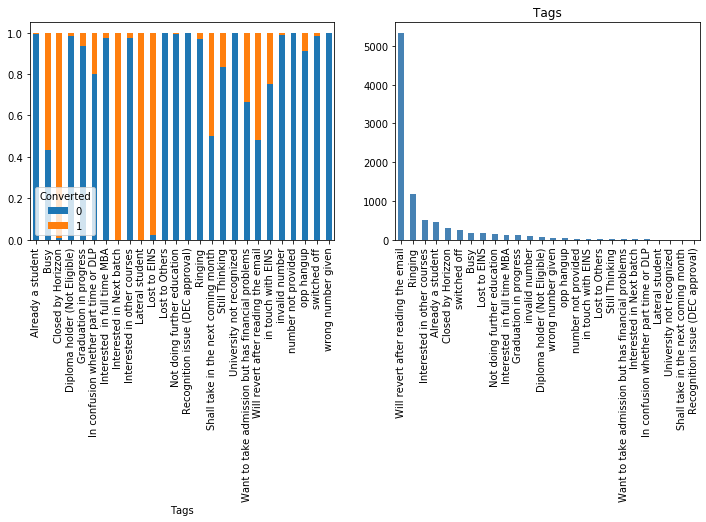

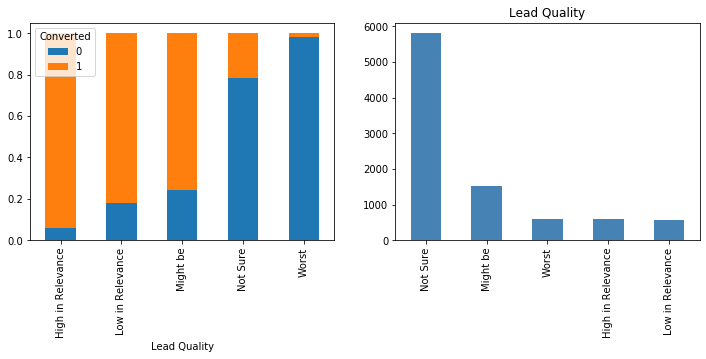

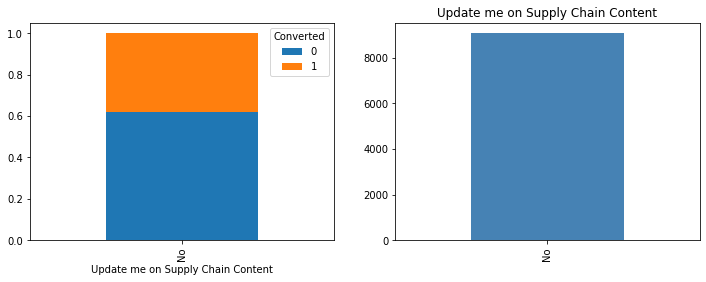

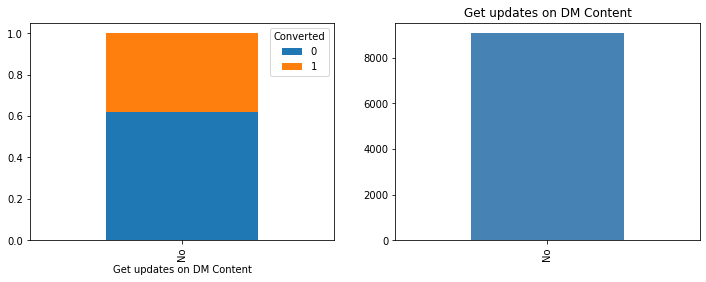

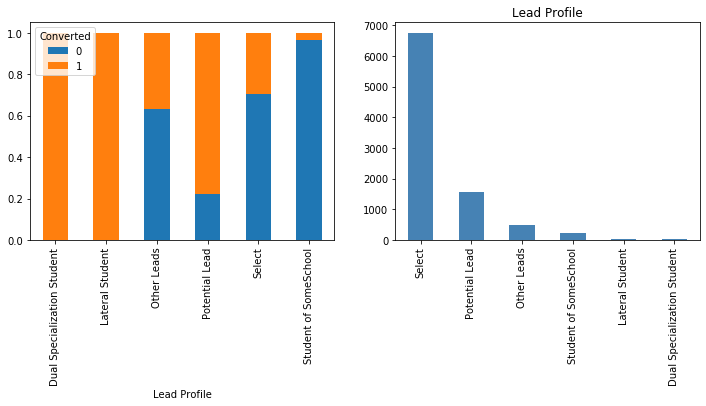

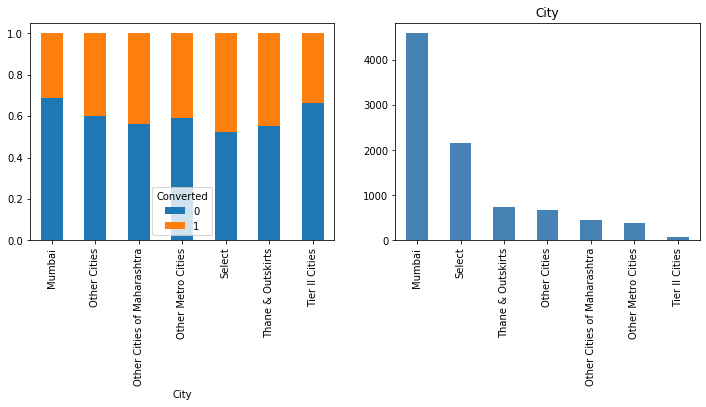

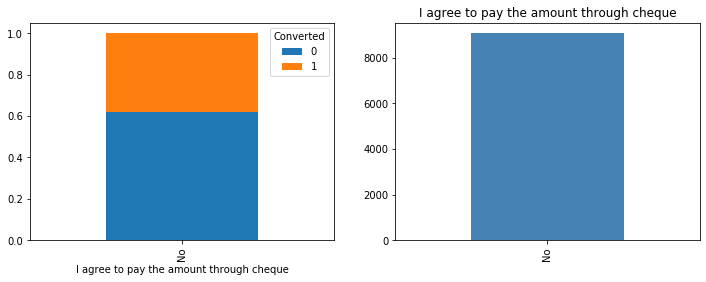

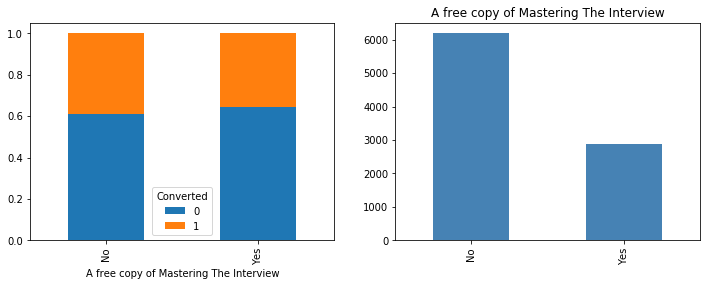

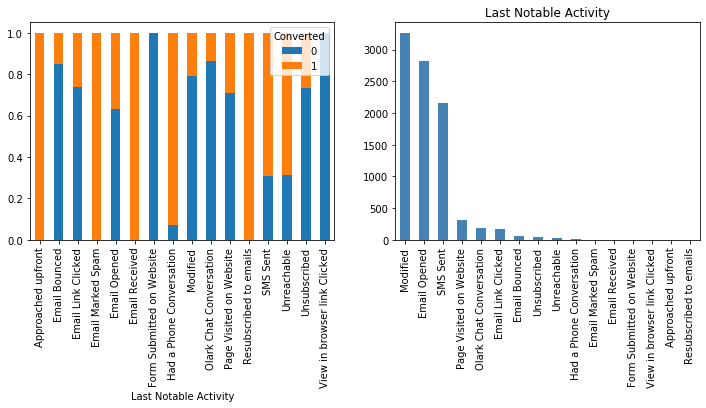

In [376]:
for attr in cat_cols:
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
  outcome_counts = ld.groupby([attr, 'Converted']).size().rename('count').reset_index()
  by_outcome = outcome_counts.pivot(columns='Converted', values='count', index=attr)
  # Plot the proportions
  by_outcome.div(by_outcome.sum(1), axis=0).plot.bar(stacked=True, ax=ax1);
  # Plot the counts
  ld[attr].value_counts().plot.bar(ax=ax2, legend=False,color='steelblue');
  print('Support (%s)\n' % attr)
  print(ld[attr].value_counts(), '\n')
  plt.title(attr);

In [377]:
for attr in cat_cols:
    conversion_resp_rates = (ld.groupby(attr).Converted.value_counts() / ld.groupby(attr).size()).rename('rate').reset_index()
    conversion_pos_rates = conversion_resp_rates.query('Converted == 1')
    print(conversion_pos_rates, '\t','\n')
  

               Lead Origin  Converted      rate
1                      API          1  0.311627
3  Landing Page Submission          1  0.361720
4            Lead Add Form          1  0.936317
7              Lead Import          1  0.300000 	 

         Lead Source  Converted      rate
0         Click2call          1  0.750000
3     Direct Traffic          1  0.321667
5           Facebook          1  0.290323
7             Google          1  0.399930
8          Live Chat          1  1.000000
9             NC_EDM          1  1.000000
11        Olark Chat          1  0.255562
13    Organic Search          1  0.377816
16         Reference          1  0.925508
19    Referral Sites          1  0.248000
21      Social Media          1  0.500000
22           WeLearn          1  1.000000
23  Welingak Website          1  0.984496
26              bing          1  0.166667 	 

  Do Not Email  Converted      rate
1           No          1  0.398540
3          Yes          1  0.145251 	 

  Do Not C

13               Tier II Cities          1  0.337838 	 

  I agree to pay the amount through cheque  Converted      rate
1                                       No          1  0.378554 	 

  A free copy of Mastering The Interview  Converted      rate
1                                     No          1  0.388781
3                                    Yes          1  0.356648 	 

       Last Notable Activity  Converted      rate
0         Approached upfront          1  1.000000
2              Email Bounced          1  0.150000
4         Email Link Clicked          1  0.260116
5          Email Marked Spam          1  1.000000
7               Email Opened          1  0.369111
8             Email Received          1  1.000000
10  Had a Phone Conversation          1  0.928571
13                  Modified          1  0.208142
15   Olark Chat Conversation          1  0.136612
17   Page Visited on Website          1  0.292453
18    Resubscribed to emails          1  1.000000
19                  S

In [378]:
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [379]:
ld.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,Interested in other courses,Low in Relevance,No,No,Select,Select,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,Ringing,Not Sure,No,No,Select,Select,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,Ringing,Not Sure,No,No,Select,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,No,No,Modified


In [380]:
ld= ld.drop(["Lead Number"],axis=1)

In [381]:
list(zip(ld.columns,ld.dtypes,ld.nunique()))

[('Lead Origin', dtype('O'), 4),
 ('Lead Source', dtype('O'), 21),
 ('Do Not Email', dtype('O'), 2),
 ('Do Not Call', dtype('O'), 2),
 ('Converted', dtype('int64'), 2),
 ('TotalVisits', dtype('float64'), 41),
 ('Total Time Spent on Website', dtype('int64'), 1717),
 ('Page Views Per Visit', dtype('float64'), 114),
 ('Last Activity', dtype('O'), 17),
 ('Country', dtype('O'), 38),
 ('Specialization', dtype('O'), 19),
 ('How did you hear about X Education', dtype('O'), 10),
 ('What is your current occupation', dtype('O'), 6),
 ('What matters most to you in choosing a course', dtype('O'), 3),
 ('Search', dtype('O'), 2),
 ('Magazine', dtype('O'), 1),
 ('Newspaper Article', dtype('O'), 2),
 ('X Education Forums', dtype('O'), 2),
 ('Newspaper', dtype('O'), 2),
 ('Digital Advertisement', dtype('O'), 2),
 ('Through Recommendations', dtype('O'), 2),
 ('Receive More Updates About Our Courses', dtype('O'), 1),
 ('Tags', dtype('O'), 26),
 ('Lead Quality', dtype('O'), 5),
 ('Update me on Supply Chain

In [382]:
cols=['Do Not Email','Do Not Call','Digital Advertisement','Through Recommendations','Search','Newspaper Article','X Education Forums',
     'Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

In [383]:
for alt in cols:
    ld[alt]=np.where(ld[alt]=="Yes",1,0)
    ld[alt]=pd.to_numeric(ld[alt],errors="coerce")

C:\Users\ujjawalv\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [384]:
cat_cols=ld.select_dtypes(["O"]).columns

In [385]:
ld=ld.drop(['I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content',
          'Receive More Updates About Our Courses','Through Recommendations','Digital Advertisement', 'Magazine'],1)

In [386]:
cat_cols=ld.select_dtypes(["O"]).columns

In [387]:
for col in cat_cols:
    freqs=ld[col].value_counts()
    k=freqs.index[freqs>100]
    for cat in k:
        name=col+'_'+cat
        ld[name]=(ld[col]==cat).astype(int)
    del ld[col]
    print(col)

Lead Origin
Lead Source
Last Activity
Country
Specialization
How did you hear about X Education
What is your current occupation
What matters most to you in choosing a course
Tags
Lead Quality
Lead Profile
City
Last Notable Activity


In [388]:
ld.select_dtypes(["O"]).columns

Index([], dtype='object')

In [389]:
ld=ld.drop(["Lead Quality_Not Sure"],1)

In [390]:
ld=ld.drop(['What matters most to you in choosing a course_Better Career Prospects'],1)

In [391]:
ld=ld.drop(["Lead Origin_Landing Page Submission"],1)

In [392]:
ld=ld.drop(["What is your current occupation_Unemployed"],1)

In [393]:
ld=ld.drop(["Lead Origin_Lead Add Form"],1)

In [394]:
ld=ld.drop(["How did you hear about X Education_Select"],1)

In [395]:
ld=ld.drop(["Lead Source_Google"],1)

In [396]:
ld=ld.drop(["Country_India"],1)

In [397]:
ld=ld.drop(["Tags_Will revert after reading the email"],1)

In [398]:
ld=ld.drop(["Last Notable Activity_SMS Sent"],1)

In [399]:
ld=ld.drop(["Specialization_Select"],1)

In [412]:
ld=ld.drop(["Lead Profile_Select"],1)

In [413]:
ld=ld.drop(["City_Mumbai"],1)

In [425]:
ld=ld.drop(["Last Activity_Email Opened"],1)

In [426]:
from sklearn.model_selection import train_test_split

In [427]:
train,test=train_test_split(ld,test_size=0.2,random_state=2)

In [428]:
x_train=train.drop(['Converted'],axis=1)
y_train=train['Converted']
x_test=test.drop(['Converted'],axis=1)
y_test=test['Converted']

In [429]:
from sklearn.linear_model import LogisticRegression

In [430]:
lm=LogisticRegression()

In [431]:
lm.fit(x_train,y_train)

C:\Users\ujjawalv\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [432]:
logr=lm.predict(x_test)

In [433]:
from sklearn.metrics import roc_auc_score

In [434]:
roc_auc_score(logr,y_test)

0.8972196272018278

In [435]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [436]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

,Features,VIF
10,Lead Origin_API,5.69
68,Last Notable Activity_Email Opened,4.62
4,Page Views Per Visit,4.42
67,Last Notable Activity_Modified,4.37
9,A free copy of Mastering The Interview,4.16


In [411]:
ld.shape

(9074, 76)

In [437]:
## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [438]:
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [439]:
feature_sel_model.get_support()

array([ True, False,  True,  True,  True, False, False, False, False,
       False,  True,  True, False, False,  True,  True, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True,  True,  True,  True,  True, False,  True, False, False,
       False,  True,  True,  True,  True,  True, False, False,  True,
       False, False, False, False,  True, False, False, False, False])

In [440]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = x_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 72
selected features: 24


NameError: name 'sel_' is not defined

In [441]:
selected_feat

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_API', 'Lead Source_Direct Traffic',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Ringing',
       'Tags_Interested in other courses', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_switched off', 'Tags_Lost to EINS',
       'Lead Quality_Might be', 'Lead Quality_Worst',
       'Lead Quality_High in Relevance', 'Lead Quality_Low in Relevance',
       'Lead Profile_Potential Lead', 'City_Select',
       'Last Notable Activity_Modified'],
      dtype='object')

In [442]:
x_train=x_train[selected_feat]

In [443]:
x_test=x_test[selected_feat]

In [445]:
lm.fit(x_train,y_train)

C:\Users\ujjawalv\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [460]:
logr=lm.predict_proba(x_test)[:,1]

In [461]:
roc_auc_score(logr,y_test)

ValueError: continuous format is not supported

In [463]:
logr=logr*100

In [464]:
logr

array([ 2.54016043, 82.3155678 , 13.79226546, ...,  3.6874834 ,
        0.27610973, 11.00071733])